<a href="https://colab.research.google.com/github/Sabha95/DataMining-DataAnalytics-Assig/blob/main/Loan_Defaulters_Prediction_till_11_march.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
loan = "/content/sample_data/final_cleaned.csv"
df_2 = pd.read_csv(loan)
#print(df_2.head())
df_2.isnull().sum()


,0
funded_amnt,0
int_rate,0
installment,0
emp_length,0
annual_inc,0
dti,0
delinq_2yrs,0
fico_range_low,0
fico_range_high,0
inq_last_6mths,0


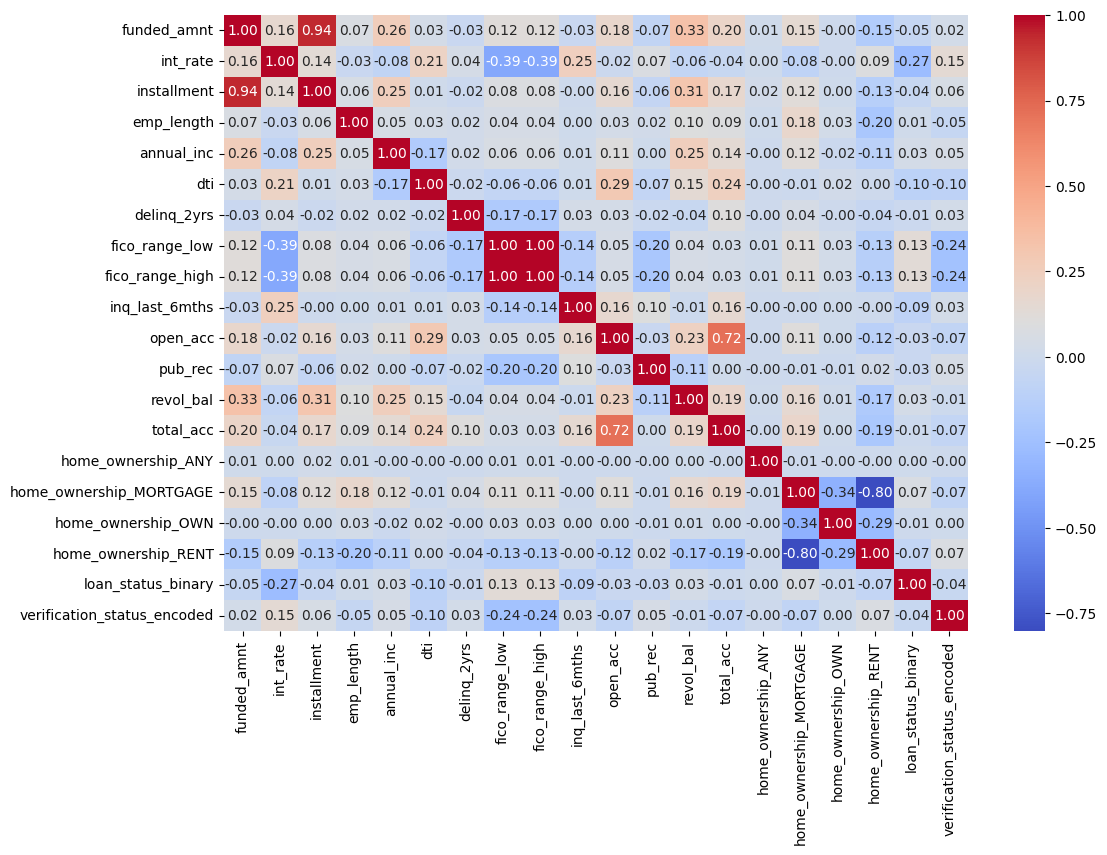

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [5]:
df_2['fico_avg'] = (df_2['fico_range_low'] + df_2['fico_range_high']) / 2
df_2.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)


In [6]:
print(df_2.head())

   funded_amnt  int_rate  installment  emp_length  annual_inc    dti  \
0         3600     13.99       123.03        10.5     55000.0   5.91   
1        24700     11.99       820.28        10.5     65000.0  16.06   
2        20000     10.78       432.66        10.5     63000.0  10.78   
3        35000     14.85       829.90        10.5    110000.0  17.06   
4        10400     22.45       289.91         3.0    104433.0  25.37   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0            0               1         7        0       2765         13   
1            1               4        22        0      21470         38   
2            0               0         6        0       7869         18   
3            0               0        13        0       7802         17   
4            1               3        12        0      21929         35   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_OWN  \
0                   0                        1

loan_status_binary
 1    29197
 0     6424
-1      278
Name: count, dtype: int64
loan_status_binary
 1    81.330956
 0    17.894649
-1     0.774395
Name: proportion, dtype: float64


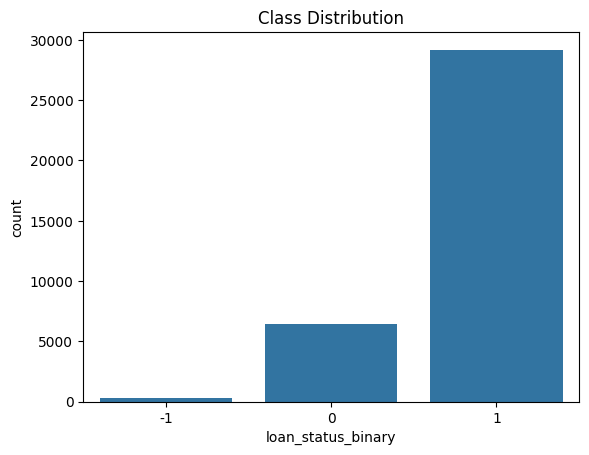

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df_2['loan_status_binary'].value_counts())

# Check percentage distribution
print(df_2['loan_status_binary'].value_counts(normalize=True) * 100)

# Plot the class distribution
sns.countplot(x=df_2['loan_status_binary'])
plt.title('Class Distribution')
plt.show()


In [8]:
df_3 = df_2[df_2['loan_status_binary'] != -1] #dropped -1 as they are negligible


loan_status_binary
1    29197
0     6424
Name: count, dtype: int64
loan_status_binary
1    81.965694
0    18.034306
Name: proportion, dtype: float64


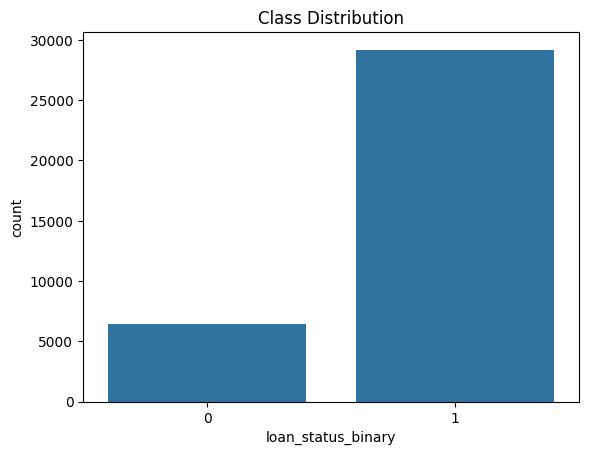

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df_3['loan_status_binary'].value_counts())

# Check percentage distribution
print(df_3['loan_status_binary'].value_counts(normalize=True) * 100)

# Plot the class distribution
sns.countplot(x=df_3['loan_status_binary'])
plt.title('Class Distribution')
plt.show()

**Feature Selection with Random forest Clasifier**

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Assume 'df_2' is your dataset and 'target' is the column with the target variable
X = df_2.drop('loan_status_binary', axis=1)  # Drop the target variable from features
y = df_2['loan_status_binary']  # Target variable

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)


                        Feature  Importance
1                      int_rate    0.114978
5                           dti    0.114006
10                    revol_bal    0.111208
2                   installment    0.097191
4                    annual_inc    0.095271
11                    total_acc    0.085830
0                   funded_amnt    0.077516
8                      open_acc    0.073359
17                     fico_avg    0.065907
3                    emp_length    0.049944
7                inq_last_6mths    0.026919
16  verification_status_encoded    0.023197
6                   delinq_2yrs    0.022331
9                       pub_rec    0.017686
15          home_ownership_RENT    0.009006
13      home_ownership_MORTGAGE    0.008597
14           home_ownership_OWN    0.007055
12           home_ownership_ANY    0.000000


**Spliting the test data and traning data. and applying random forest to know the model accuracy, but the data is still not balanced**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression

# Define features and target variable
X = df_3[['int_rate', 'dti', 'revol_bal', 'annual_inc','funded_amnt', 'fico_avg','open_acc','emp_length','pub_rec','home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_ANY', 'home_ownership_MORTGAGE']]
y = df_3['loan_status_binary']  # Replace 'target' with your actual target column

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)  # Use RandomForestRegressor for regression tasks
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy: {accuracy:.4f}")



Model Accuracy: 0.8241


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression

# Define features and target variable
X = df_3[['int_rate', 'dti', 'revol_bal', 'annual_inc','funded_amnt', 'fico_avg','open_acc','emp_length','pub_rec','home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_ANY', 'home_ownership_MORTGAGE']]
y = df_3['loan_status_binary']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=100,   # Keep 100 trees (or increase to 200)
    max_depth=15,       # Restrict tree depth (try 10-20)
    min_samples_split=10,  # Require more samples before a split
    random_state=42
)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy [Balanced class weights]: {accuracy:.4f}")


train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy [Balanced class weights]: 0.7628
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35      1236
           1       0.86      0.85      0.86      5889

    accuracy                           0.76      7125
   macro avg       0.60      0.60      0.60      7125
weighted avg       0.77      0.76      0.77      7125



In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE on Training Data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 3: Train Random Forest Model on Resampled Data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',  # Using F1-score to handle imbalance
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Step 4: Evaluate Model
#y_pred = rf_model.predict(X_test)
#print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy [SMOTE Analysis]: {accuracy:.4f}")


train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize class distribution after SMOTE
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Loan Status Binary')------------------------------------------------------------------------------------------------------
plt.ylabel('Count')
plt.show()



Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


NameError: name 'accuracy_score' is not defined

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply Random Undersampling on Training Data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Step 3: Train Random Forest Model on Resampled Data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy [Random Undersampling]: {accuracy:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy [Random Undersampling]: 0.6118
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.65      0.37      1236
           1       0.89      0.60      0.72      5889

    accuracy                           0.61      7125
   macro avg       0.57      0.63      0.54      7125
weighted avg       0.78      0.61      0.66      7125



In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply ADASYN on Training Data
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Step 3: Train Random Forest Model on Resampled Data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy [ADASYN]: {accuracy:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy [ADASYN]: 0.7959
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.16      0.21      1236
           1       0.84      0.93      0.88      5889

    accuracy                           0.80      7125
   macro avg       0.58      0.54      0.55      7125
weighted avg       0.75      0.80      0.77      7125



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced')

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Use mean_squared_error for regression
print(f"Model Accuracy [Balanced class weights]: {accuracy:.4f}")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy [Balanced class weights]: 0.6553
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.63      0.39      1236
           1       0.89      0.66      0.76      5889

    accuracy                           0.66      7125
   macro avg       0.59      0.64      0.57      7125
weighted avg       0.79      0.66      0.70      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)  # You can also specify other parameters, such as sampling_strategy
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the resampled data
log_reg_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
print(f"Model Accuracy (with SMOTE): {accuracy:.4f}")

# Print the Classification Report
print("Logistic Regression Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred))


Model Accuracy (with SMOTE): 0.7259
Logistic Regression Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.30      0.45      0.36      1236
           1       0.87      0.78      0.83      5889

    accuracy                           0.73      7125
   macro avg       0.59      0.62      0.59      7125
weighted avg       0.77      0.73      0.75      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the undersampled data
log_reg_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
print(f"Model Accuracy (with Random Undersampling): {accuracy:.4f}")

# Print the Classification Report
print("Logistic Regression Classification Report (with Random Undersampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with Random Undersampling): 0.6543
Logistic Regression Classification Report (with Random Undersampling):
              precision    recall  f1-score   support

           0       0.28      0.62      0.38      1236
           1       0.89      0.66      0.76      5889

    accuracy                           0.65      7125
   macro avg       0.59      0.64      0.57      7125
weighted avg       0.79      0.65      0.69      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN Oversampling to the training data
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Create the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model on the oversampled data
log_reg_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
print(f"Model Accuracy (with ADASYN Oversampling): {accuracy:.4f}")

# Print the Classification Report
print("Logistic Regression Classification Report (with ADASYN Oversampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with ADASYN Oversampling): 0.6984
Logistic Regression Classification Report (with ADASYN Oversampling):
              precision    recall  f1-score   support

           0       0.28      0.48      0.36      1236
           1       0.87      0.74      0.80      5889

    accuracy                           0.70      7125
   macro avg       0.58      0.61      0.58      7125
weighted avg       0.77      0.70      0.73      7125



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#XGBoost
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Assume X, y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost model after SMOTE
xgb_smote = XGBClassifier(n_estimators=100, random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = xgb_smote.predict(X_test)
print("SMOTE Results:")
print(classification_report(y_test, y_pred_smote))

# Apply ADASYN to oversample the minority class
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train XGBoost model after ADASYN
xgb_adasyn = XGBClassifier(n_estimators=100, random_state=42)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = xgb_adasyn.predict(X_test)
print("ADASYN Results:")
print(classification_report(y_test, y_pred_adasyn))

# Apply Random Undersampling to balance dataset
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Train XGBoost model after Random Undersampling
xgb_rus = XGBClassifier(n_estimators=100, random_state=42)
xgb_rus.fit(X_train_rus, y_train_rus)

y_pred_rus = xgb_rus.predict(X_test)
print("Random Undersampling Results:")
print(classification_report(y_test, y_pred_rus))


SMOTE Results:
              precision    recall  f1-score   support

           0       0.39      0.11      0.17      1285
           1       0.83      0.96      0.89      5840

    accuracy                           0.81      7125
   macro avg       0.61      0.54      0.53      7125
weighted avg       0.75      0.81      0.76      7125

ADASYN Results:
              precision    recall  f1-score   support

           0       0.37      0.12      0.18      1285
           1       0.83      0.96      0.89      5840

    accuracy                           0.80      7125
   macro avg       0.60      0.54      0.54      7125
weighted avg       0.75      0.80      0.76      7125

Random Undersampling Results:
              precision    recall  f1-score   support

           0       0.27      0.66      0.38      1285
           1       0.89      0.60      0.72      5840

    accuracy                           0.61      7125
   macro avg       0.58      0.63      0.55      7125
weighted avg 

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate sample weights based on the target values
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Create the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model with sample weights
gbc_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict the target variable for the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with Balanced Sample Weights): {accuracy:.4f}")

# Print the Classification Report
print("Gradient Boosting Classification Report (with Balanced Sample Weights):")
print(classification_report(y_test, y_pred))


Model Accuracy (with Balanced Sample Weights): 0.6331
Gradient Boosting Classification Report (with Balanced Sample Weights):
              precision    recall  f1-score   support

           0       0.27      0.67      0.39      1236
           1       0.90      0.63      0.74      5889

    accuracy                           0.63      7125
   macro avg       0.59      0.65      0.56      7125
weighted avg       0.79      0.63      0.68      7125



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data
gbc_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with SMOTE Oversampling): {accuracy:.4f}")

# Print the Classification Report
print("Gradient Boosting Classification Report (with SMOTE Oversampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with SMOTE Oversampling): 0.7968
Gradient Boosting Classification Report (with SMOTE Oversampling):
              precision    recall  f1-score   support

           0       0.34      0.18      0.24      1236
           1       0.84      0.93      0.88      5889

    accuracy                           0.80      7125
   macro avg       0.59      0.55      0.56      7125
weighted avg       0.76      0.80      0.77      7125



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Undersampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Create the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data
gbc_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with Random Undersampling): {accuracy:.4f}")

# Print the Classification Report
print("Gradient Boosting Classification Report (with Random Undersampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with Random Undersampling): 0.6229
Gradient Boosting Classification Report (with Random Undersampling):
              precision    recall  f1-score   support

           0       0.27      0.69      0.39      1236
           1       0.90      0.61      0.73      5889

    accuracy                           0.62      7125
   macro avg       0.59      0.65      0.56      7125
weighted avg       0.79      0.62      0.67      7125



In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your features X and target y
X = df_3.drop(columns=['loan_status_binary'])  # Drop the target variable from the features
y = df_3['loan_status_binary']  # Target variable (Class 0 and Class 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN for oversampling the minority class
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Create the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data
gbc_model.fit(X_train_res, y_train_res)

# Predict the target variable for the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with ADASYN Oversampling): {accuracy:.4f}")

# Print the Classification Report
print("Gradient Boosting Classification Report (with ADASYN Oversampling):")
print(classification_report(y_test, y_pred))


Model Accuracy (with ADASYN Oversampling): 0.7905
Gradient Boosting Classification Report (with ADASYN Oversampling):
              precision    recall  f1-score   support

           0       0.33      0.20      0.25      1236
           1       0.84      0.91      0.88      5889

    accuracy                           0.79      7125
   macro avg       0.59      0.56      0.56      7125
weighted avg       0.75      0.79      0.77      7125

